In [400]:
%matplotlib inline
from numpy import nan, isnan
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import tensorflow.contrib.learn as skflow
from sklearn import metrics

In [350]:
data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [351]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [352]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [353]:
females = (data["Sex"] == "female")
males = (data["Sex"] == "male")
survived = (data["Survived"] == 1)
p_f = sum(females & survived)/sum(females)
p_m = sum(males & survived)/sum(males)
print("proportion of women who survived: {}".format(p_f))
print("proportion of men who survived: {}".format(p_m))

proportion of women who survived: 0.7420382165605095
proportion of men who survived: 0.18890814558058924


In [354]:
for name in data:
    print(name+":\t", len(data[name].unique()) )

PassengerId:	 891
Survived:	 2
Pclass:	 3
Name:	 891
Sex:	 2
Age:	 89
SibSp:	 7
Parch:	 7
Ticket:	 681
Fare:	 248
Cabin:	 148
Embarked:	 4


In [355]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [356]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [357]:
data["Gender"] = data["Sex"].map({'female': 0, 'male': 1}).astype(int)

In [358]:
data["Embarked2"] = data["Embarked"].map({'S': 0, 'C': 1, 'Q': 2})

In [359]:
sum(data['Age'].isnull())

177

In [360]:
data.groupby(['Gender', 'Pclass']).Age.median()

Gender  Pclass
0       1         35.0
        2         28.0
        3         21.5
1       1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [361]:
median_ages_map = data.groupby(['Gender', 'Pclass']).Age.median().to_dict()
median_ages_map

{(0, 1): 35.0,
 (0, 2): 28.0,
 (0, 3): 21.5,
 (1, 1): 40.0,
 (1, 2): 30.0,
 (1, 3): 25.0}

In [362]:
median_ages_map[(0,1)]

35.0

In [363]:
median_ages = data[['Gender', 'Pclass', 'Age']].apply(lambda x: median_ages_map[(x[0], x[1])] if isnan(x[2]) else x[2], axis = 1)
median_ages

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5      25.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17     30.0
18     31.0
19     21.5
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26     25.0
27     19.0
28     21.5
29     25.0
       ... 
861    21.0
862    48.0
863    21.5
864    24.0
865    42.0
866    27.0
867    31.0
868    25.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878    25.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888    21.5
889    26.0
890    32.0
dtype: float64

In [364]:
data['Age'] = median_ages

In [365]:
data[data['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,Embarked2


In [366]:
sum(data['Age'].isnull())

0

In [367]:
data['FamilySize'] = data['SibSp'] + data['Parch']

In [368]:
data['Age*Class'] = data.Age * data.Pclass

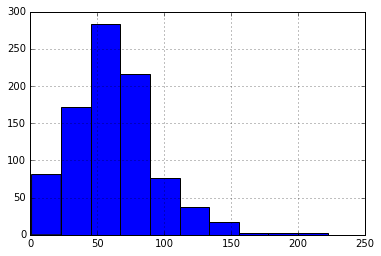

In [369]:
data['Age*Class'].hist()

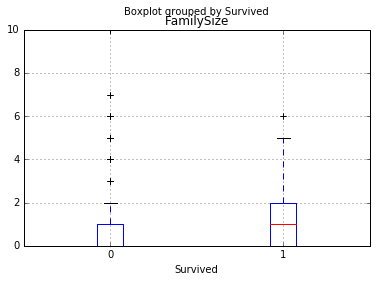

In [370]:
data.boxplot(column = 'FamilySize', by = 'Survived')

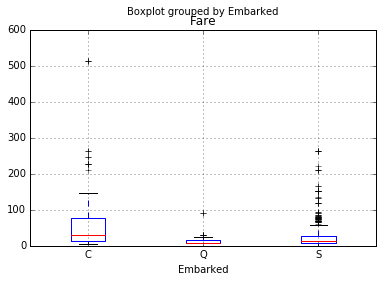

In [371]:
data[data['Fare'].notnull()].boxplot(column = 'Fare', by = 'Embarked')

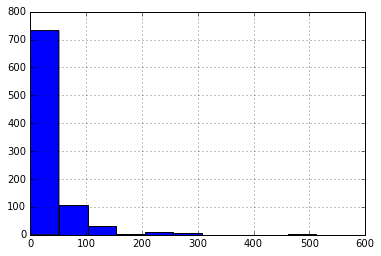

In [372]:
data.Fare.hist()

In [373]:
data.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [374]:
data.dropna(subset = ['Embarked2'], inplace=True)

In [375]:
forest = RandomForestClassifier(n_estimators = 100)
forest = forest.fit(data.ix[0::,1::],data.ix[0::,0])

In [376]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
Survived       418 non-null int64
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [377]:
test_data[test_data['Fare'].isnull()]

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,0,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [378]:
test_data["Gender"] = test_data["Sex"].map({'female': 0, 'male': 1}).astype(int)
test_data["Embarked2"] = test_data["Embarked"].map({'S': 0, 'C': 1, 'Q': 2})
median_ages = test_data[['Gender', 'Pclass', 'Age']].apply(lambda x: median_ages_map[(x[0], x[1])] if isnan(x[2]) else x[2], axis = 1) 
test_data['Age'] = median_ages

In [379]:
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch']
test_data['Age*Class'] = test_data.Age * test_data.Pclass

In [380]:
test_data[test_data['Fare'].isnull()]

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,Embarked2,FamilySize,Age*Class
152,0,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,1,0,0,181.5


In [381]:
test_data[test_data['Fare'].isnull()] = data[(data['Pclass']==3) & (data['SibSp'] == 0) & (data['Parch'] == 0) & (data['Gender']== 1) & (data['Embarked2'] == 0)]['Fare'].median()


In [382]:
solution = test_data[['PassengerId', 'Survived']]
test_data.drop(['Survived', 'PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [383]:
output = forest.predict(test_data)

In [385]:
len(output)

418

In [386]:
output

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [393]:
solution['Survived'] = output

In [395]:
solution.to_csv(path_or_buf='./solution.csv', index = False)

In [406]:
classifier = skflow.TensorFlowDNNClassifier(hidden_units=[10, 10, 10, 20, 10, 10], n_classes=2, steps = 1000, dropout = 0.5)
classifier.fit(data.ix[0::,1::],data.ix[0::,0])

Step #100, epoch #3, avg. train loss: 0.74344
Step #200, epoch #7, avg. train loss: 0.66833
Step #300, epoch #10, avg. train loss: 0.66567
Step #400, epoch #14, avg. train loss: 0.66291
Step #500, epoch #17, avg. train loss: 0.65986
Step #600, epoch #21, avg. train loss: 0.65396
Step #700, epoch #25, avg. train loss: 0.65657
Step #800, epoch #28, avg. train loss: 0.65787
Step #900, epoch #32, avg. train loss: 0.65963
Step #1000, epoch #35, avg. train loss: 0.66027


TensorFlowDNNClassifier(batch_size=32, class_weight=None, clip_gradients=5.0,
            config=None, continue_training=False, dropout=0.5,
            hidden_units=[10, 10, 10, 20, 10, 10], learning_rate=0.1,
            n_classes=2, optimizer='Adagrad', steps=1000, verbose=1)

In [409]:
solution['Survived'] = classifier.predict(test_data)
solution.to_csv(path_or_buf='./solution_dnn.csv', index = False)

In [408]:
score = metrics.accuracy_score(data.ix[0::,0], classifier.predict(data.ix[0::,1::]))
print("Accuracy: %f" % score)

Accuracy: 0.620922
